## Housing Price Prediction

### Problem Statement
A US based housing company named Surprise Housing has decided to enter the Australian market.The commpany uses data analytics to purchase houses
at a price below thier actual values and flip them on at a higher price.
Company wants to know:
 1. Which variables are significant in predicting the price of a house.
 2. How well these variables describe the price of a house.

## Step 1: Reading and Understanding the data

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import linear_model,model_selection,metrics
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',400)
pd.set_option('display.max_columns',200)

In [2]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
df.shape

(1460, 81)

## Step 2: Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


### Handling Null values

In [6]:
df.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

In [7]:
columnNullPercentage = pd.DataFrame(round((df.isnull().sum()/len(df))*100,2).sort_values(ascending=False),columns=["Null%"])
columnNullPercentage_df = columnNullPercentage[columnNullPercentage["Null%"] > 0]
columnNullPercentage_df

,Null%
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
MasVnrType,59.73
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55


In [8]:
# Dropping columns having more than 30% of null values and also removing id column
df.drop(columns=['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu','Id'],inplace=True)

In [9]:
columnNull = pd.DataFrame(round((df.isnull().sum()/len(df))*100,2).sort_values(ascending=False),columns=["Null%"])
columnNull_df = columnNull[columnNull["Null%"] > 0]
columnNull_df

,Null%
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55
GarageQual,5.55
BsmtFinType2,2.60
BsmtExposure,2.60
BsmtQual,2.53
BsmtFinType1,2.53


In [10]:
for i in columnNull_df.index:
    print(i,df[i].value_counts())

LotFrontage LotFrontage
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
64.0      19
24.0      19
73.0      18
55.0      17
63.0      17
79.0      17
72.0      17
100.0     16
66.0      15
74.0      15
51.0      15
52.0      14
59.0      13
82.0      12
71.0      12
67.0      12
43.0      12
40.0      12
57.0      12
76.0      11
69.0      11
92.0      10
34.0      10
53.0      10
86.0      10
88.0      10
84.0       9
35.0       9
62.0       9
44.0       9
77.0       9
93.0       8
98.0       8
96.0       8
61.0       8
95.0       7
58.0       7
120.0      7
107.0      7
94.0       6
81.0       6
36.0       6
30.0       6
48.0       6
91.0       6
41.0       6
54.0       6
89.0       6
110.0      6
105.0      6
32.0       5
47.0       5
87.0       5
56.0       5
37.0       5
83.0       5
102.0      4
42.0       4
49.0       4
104.0      3
103.0      3
99.0       3
45.0       3
108.0      3
1

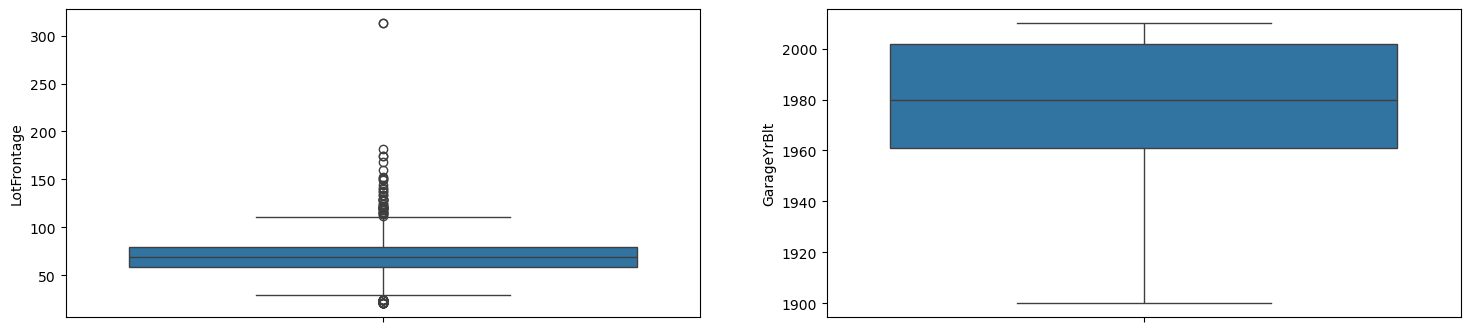

In [11]:
#Drawing box plots for continous independent variables 
columns=['LotFrontage','GarageYrBlt']
plt.figure(figsize=(18,4))
i = 1
for column in columns:
    plt.subplot(1,2,i)
    sns.boxplot(y=column,data=df)
    i+=1

In [12]:
#Feature LotFrontage has Outliers so filling missing values with median
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].median())

In [13]:
#Filing missing values with median to GarageYrBlt 
df['GarageYrBlt'] = df['GarageYrBlt'].fillna(df['GarageYrBlt'].median())

In [14]:
list(columnNull_df.index)

['LotFrontage',
 'GarageYrBlt',
 'GarageCond',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'BsmtFinType2',
 'BsmtExposure',
 'BsmtQual',
 'BsmtFinType1',
 'BsmtCond',
 'MasVnrArea',
 'Electrical']

In [15]:
#For categorical columns imputing null values with mode
categorical_columns= ['GarageCond','GarageType','GarageFinish','GarageQual','BsmtFinType2','BsmtExposure','BsmtQual','BsmtFinType1','BsmtCond','MasVnrArea','Electrical']
for col in categorical_columns:
    df[col]= df[col].fillna(df[col].mode()[0])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [17]:
df.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,69.863699,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.117123,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.589041,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,22.027677,9981.264932,1.382997,1.112799,30.202904,20.645407,180.731373,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,23.997022,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,60.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1962.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,79.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,164.250000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2001.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [18]:
Info_col= ['PoolArea','MiscVal','3SsnPorch','ScreenPorch','EnclosedPorch']
for col in Info_col:
    print(col,df[col].value_counts())

PoolArea PoolArea
0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: count, dtype: int64
MiscVal MiscVal
0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: count, dtype: int64
3SsnPorch 3SsnPorch
0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: count, dtype: int64
ScreenPorch ScreenPorch
0      1344
192       6
120       5
224       5
189       4
180       4
147       3
90        3
160       3
144       3
126       3
168       3
198       2
259       2
288       2
184       2
176       2
200       

In [19]:
#Dropping column 'PoolArea','MiscVal','3SsnPorch' as it is dominated by one value
df.drop(columns = ['PoolArea','MiscVal','3SsnPorch'],inplace=True)

In [20]:
df.shape

(1460, 71)

### Handling Outliers

In [21]:
continous_col = df.select_dtypes(exclude='object').columns
continous_col

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [22]:
Q1 = df[continous_col].quantile(0.05)
Q3 = df[continous_col].quantile(0.95)
IQR = Q3 -Q1
IQR

MSSubClass          140.00
LotFrontage          68.05
LotArea           14089.45
OverallQual           4.00
OverallCond           4.00
YearBuilt            91.00
YearRemodAdd         57.00
MasVnrArea          456.00
BsmtFinSF1         1274.00
BsmtFinSF2          396.20
BsmtUnfSF          1468.00
TotalBsmtSF        1233.70
1stFlrSF           1158.30
2ndFlrSF           1141.05
LowQualFinSF          0.00
GrLivArea          1618.10
BsmtFullBath          1.00
BsmtHalfBath          1.00
FullBath              1.00
HalfBath              1.00
BedroomAbvGr          2.00
KitchenAbvGr          0.00
TotRmsAbvGrd          6.00
Fireplaces            2.00
GarageYrBlt          77.00
GarageCars            3.00
GarageArea          850.10
WoodDeckSF          335.00
OpenPorchSF         175.05
EnclosedPorch       180.15
ScreenPorch         160.00
MoSold                9.00
YrSold                4.00
SalePrice        238100.00
dtype: float64

In [23]:
#Removing the outliers from dataset
df = df[~((df[continous_col]< (Q1 -1.5*IQR)) | (df[continous_col] > (Q3 + 1.5*IQR))).any(axis=1)]

In [24]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,12,2008,WD,Normal,250000


In [25]:
df.shape

(1333, 71)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1333 entries, 0 to 1459
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1333 non-null   int64  
 1   MSZoning       1333 non-null   object 
 2   LotFrontage    1333 non-null   float64
 3   LotArea        1333 non-null   int64  
 4   Street         1333 non-null   object 
 5   LotShape       1333 non-null   object 
 6   LandContour    1333 non-null   object 
 7   Utilities      1333 non-null   object 
 8   LotConfig      1333 non-null   object 
 9   LandSlope      1333 non-null   object 
 10  Neighborhood   1333 non-null   object 
 11  Condition1     1333 non-null   object 
 12  Condition2     1333 non-null   object 
 13  BldgType       1333 non-null   object 
 14  HouseStyle     1333 non-null   object 
 15  OverallQual    1333 non-null   int64  
 16  OverallCond    1333 non-null   int64  
 17  YearBuilt      1333 non-null   int64  
 18  YearRemodAdd 

In [62]:
## Step 3: Performing EDA

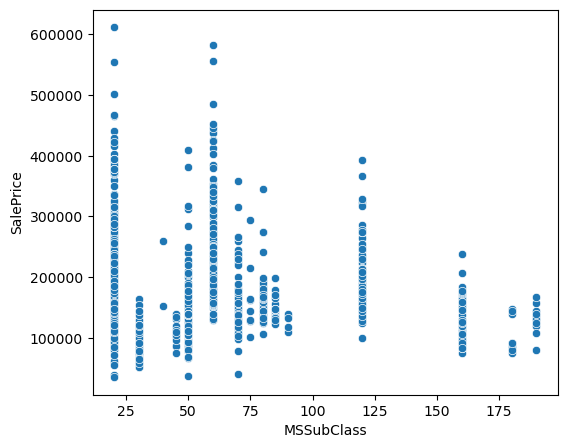

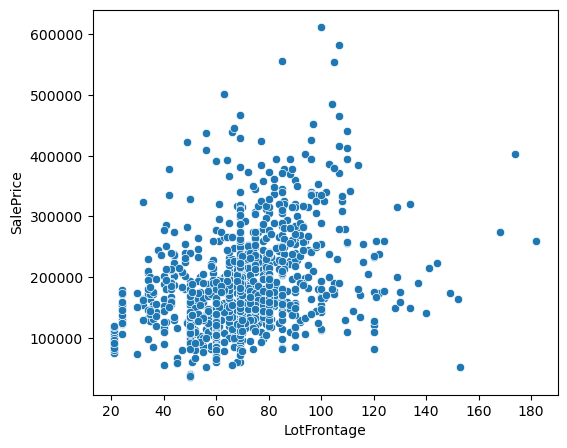

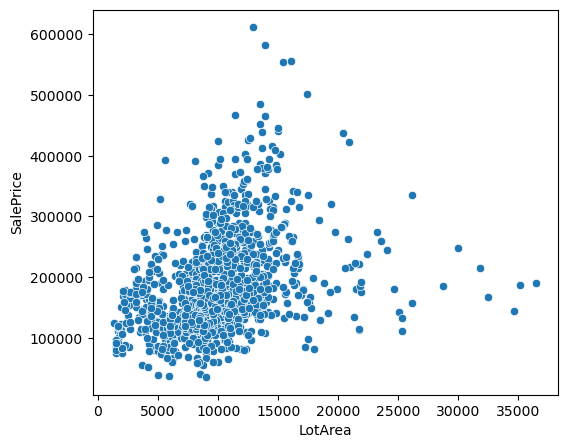

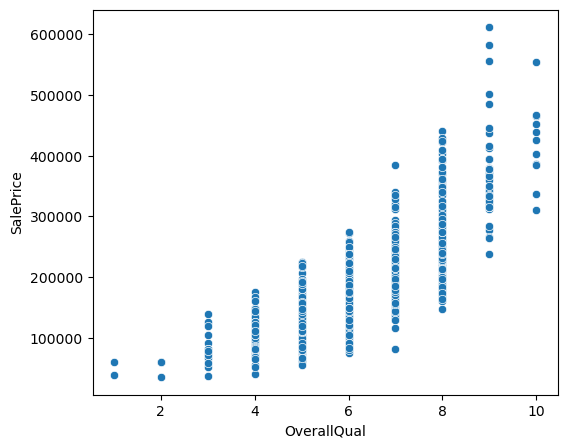

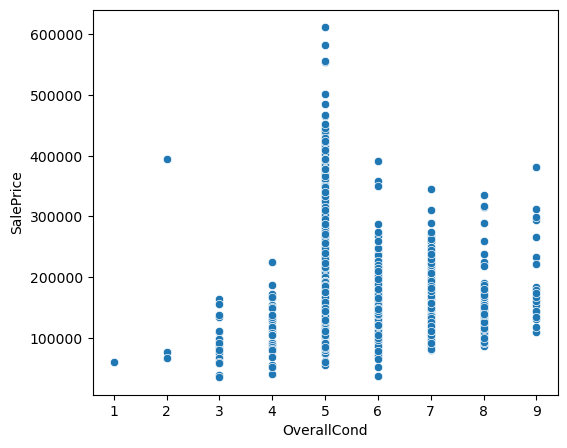

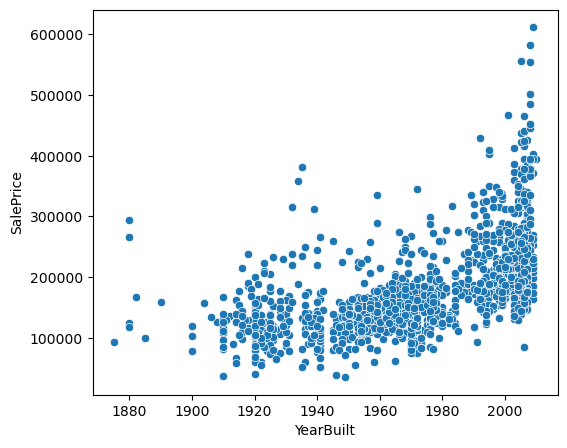

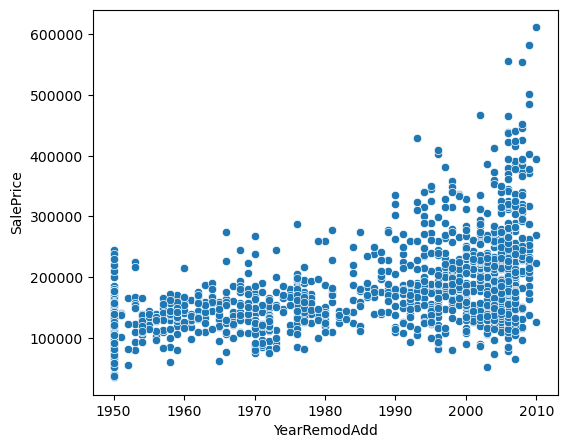

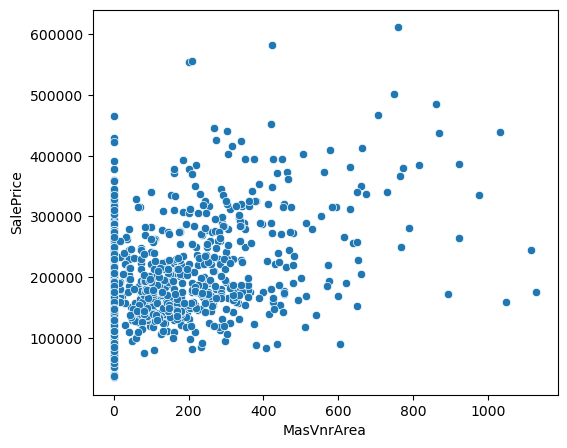

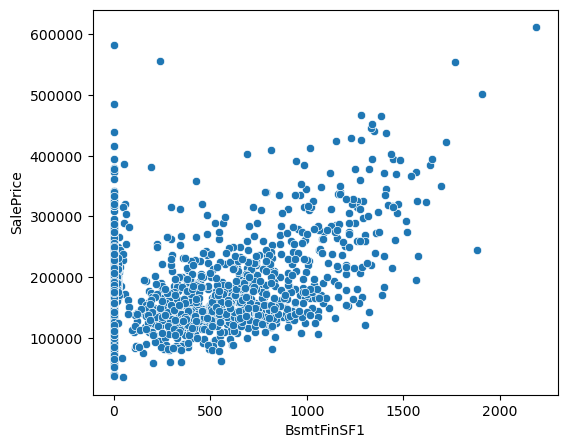

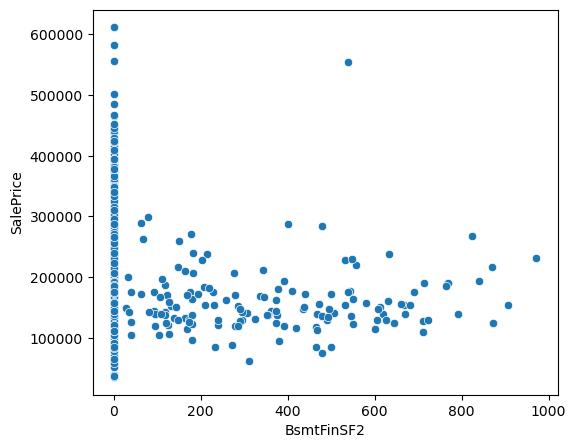

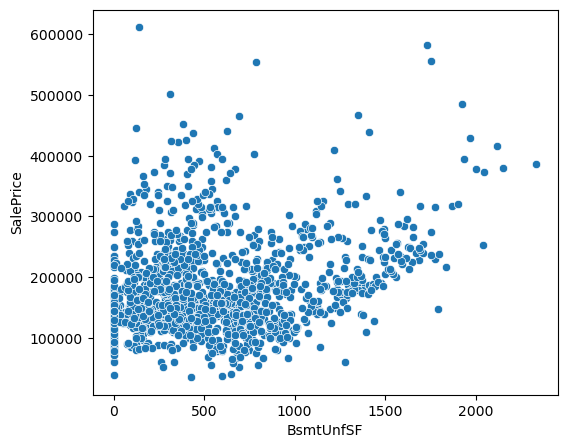

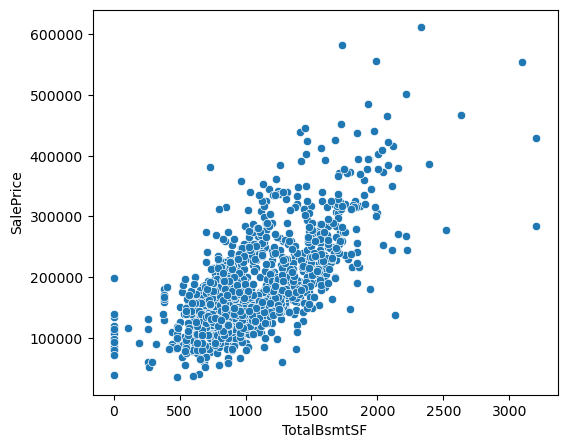

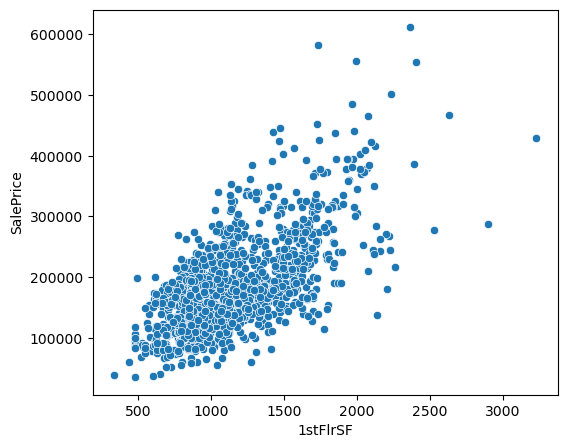

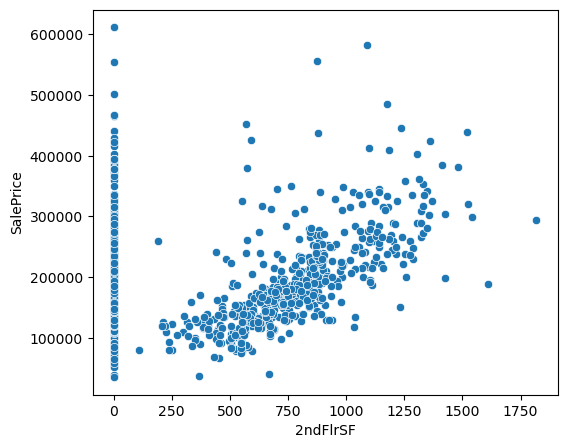

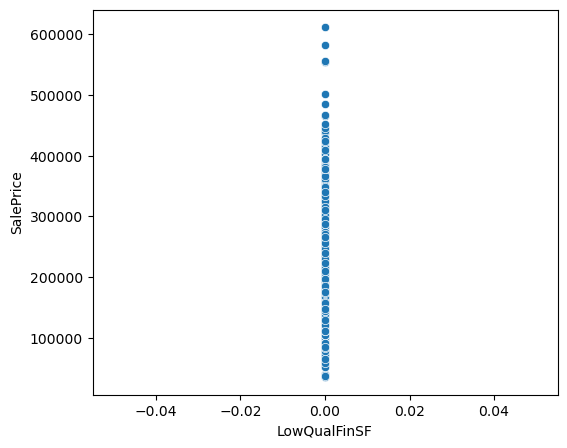

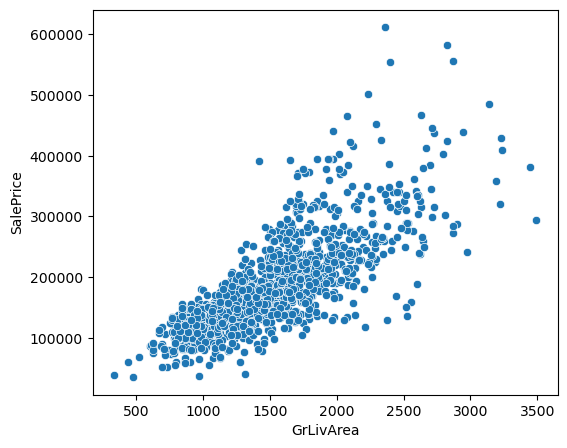

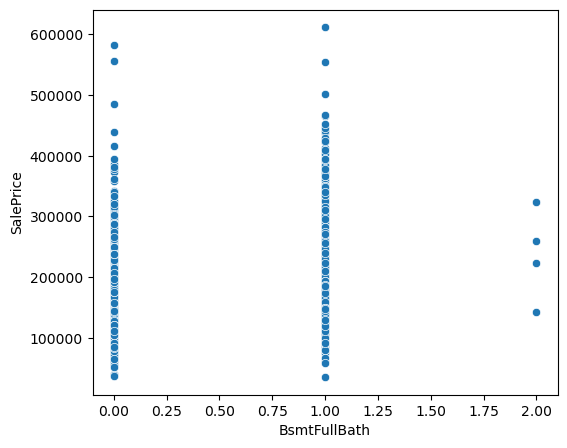

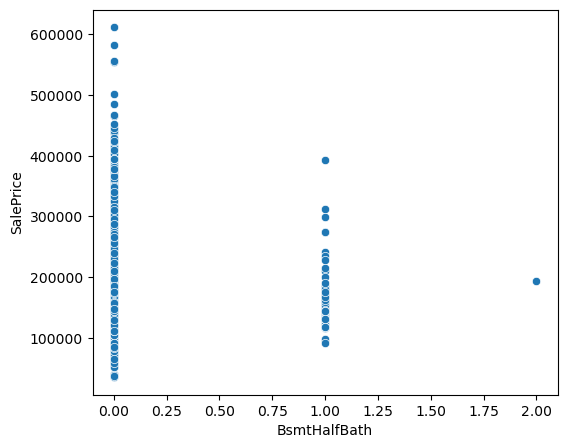

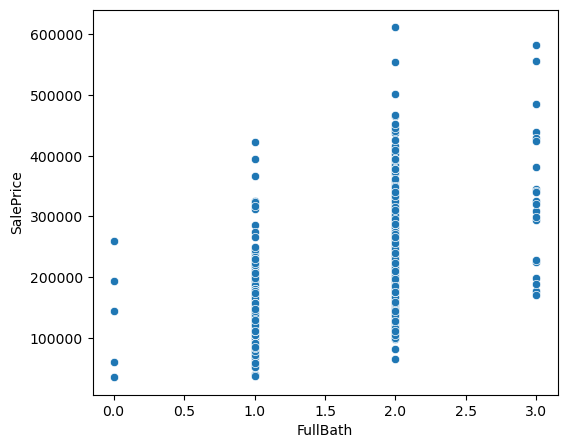

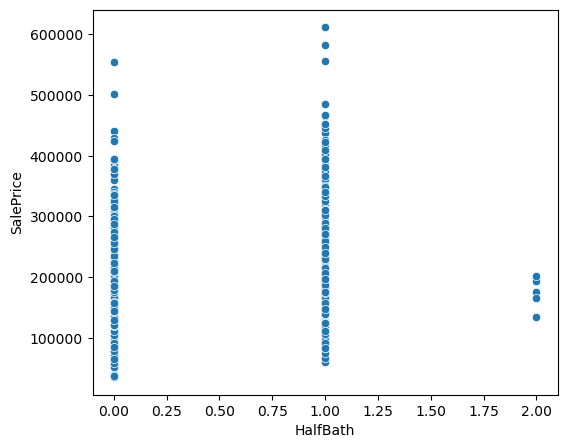

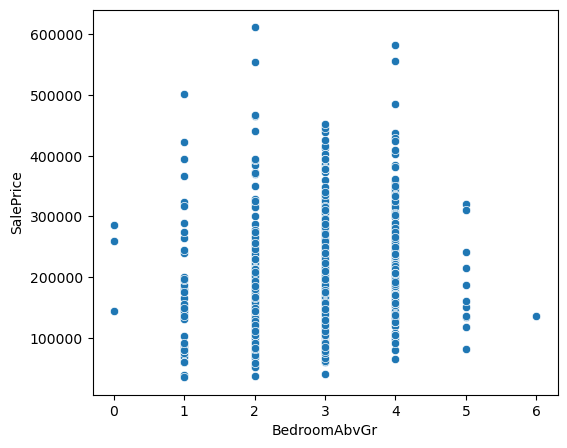

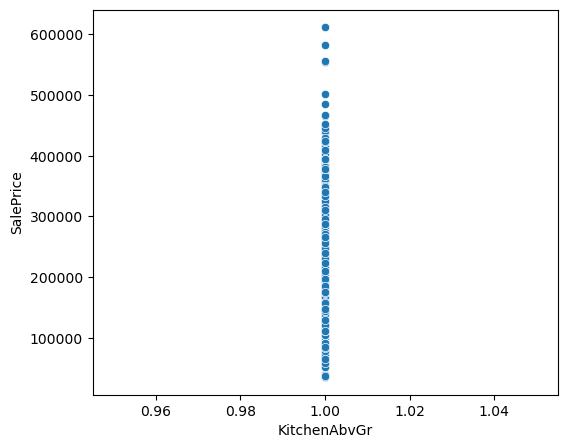

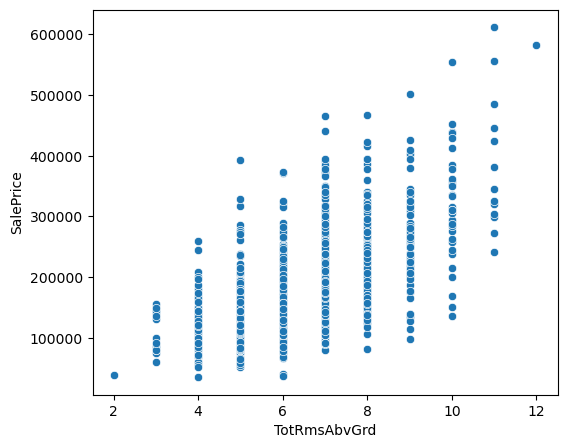

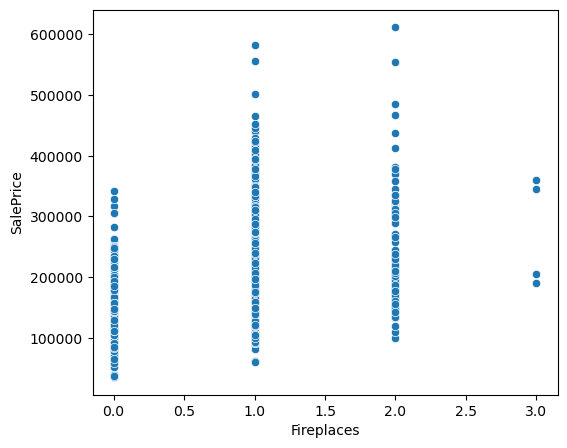

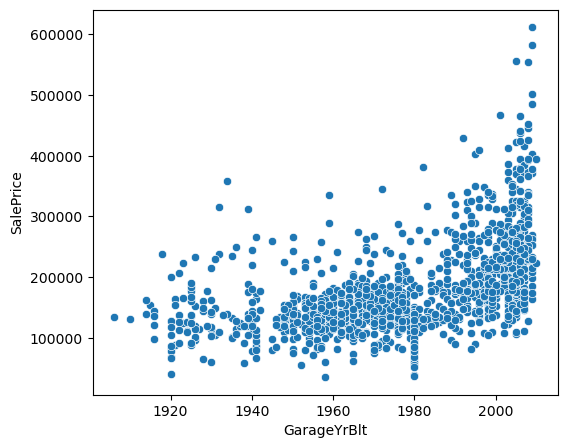

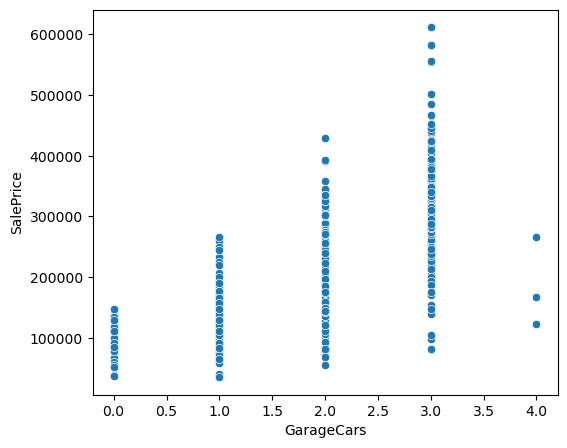

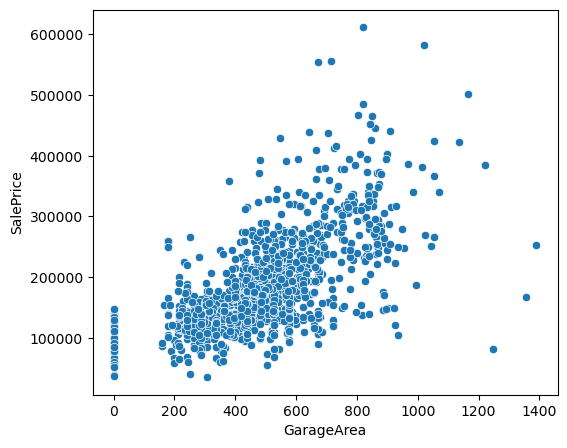

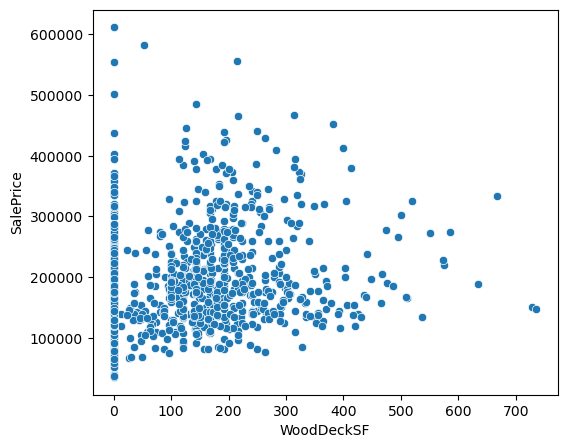

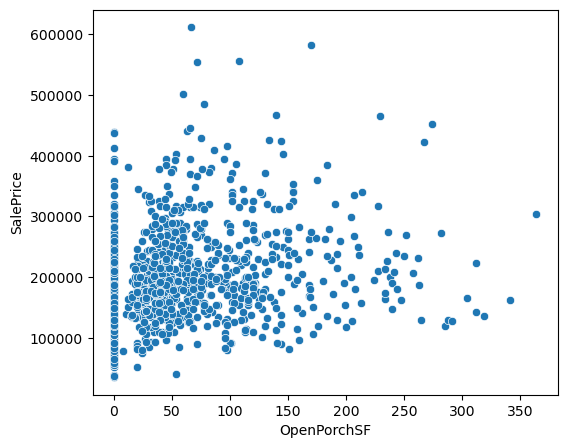

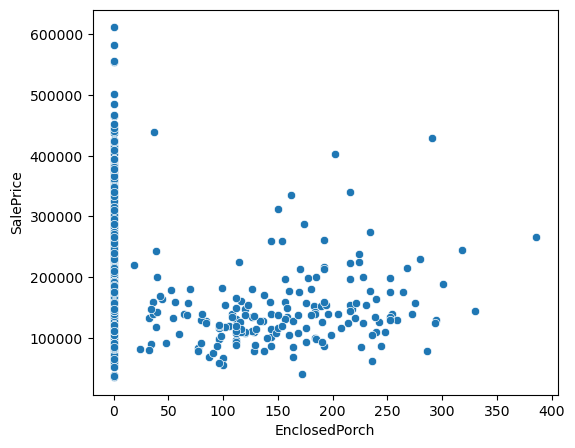

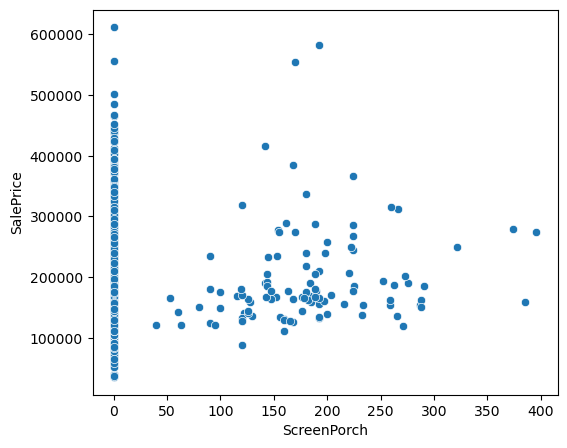

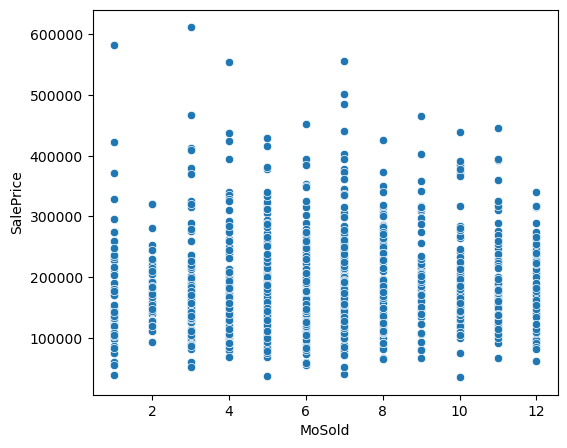

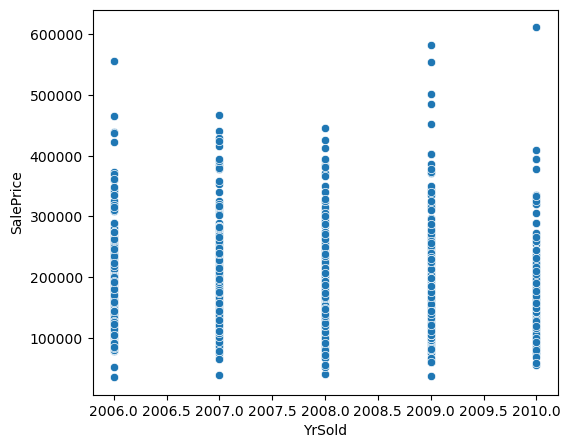

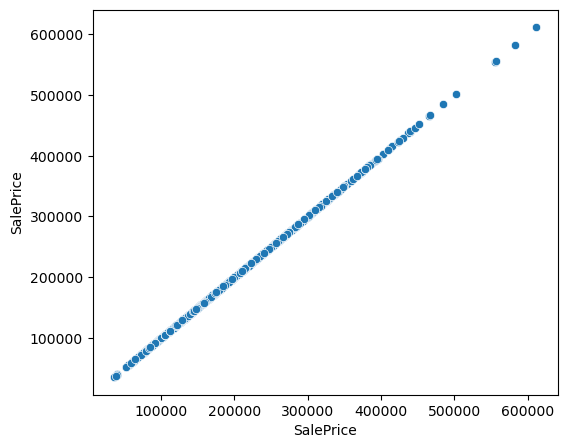

In [27]:
#Drawing scatterplots to check the linear relationShip of continous variables with SalesPrice
for i in continous_col:
    plt.figure(figsize=(6,5))
    sns.scatterplot(data=df,x =i,y = 'SalePrice')
plt.show()

In [28]:
df[continous_col].corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.425187,-0.369099,0.090690,-0.072448,0.122090,0.084129,0.054778,-0.051959,-0.059338,-0.159733,-0.251979,-0.294396,0.311003,NaN,0.050132,0.026717,-0.006741,0.101069,0.227143,-0.118545,NaN,-0.038974,-0.004254,0.120312,0.001658,-0.070819,0.015978,0.012697,-0.038133,-0.021604,-0.017910,-0.018475,-0.048687
LotFrontage,-0.425187,1.000000,0.522820,0.230567,-0.060769,0.146645,0.081453,0.166417,0.132043,0.032642,0.150062,0.318227,0.355994,0.037037,NaN,0.305102,0.055338,-0.014919,0.172703,0.049849,0.263154,NaN,0.309855,0.222612,0.084835,0.306165,0.331507,0.086312,0.135821,-0.007528,0.052996,0.010662,0.007208,0.363022
LotArea,-0.369099,0.522820,1.000000,0.162689,-0.029780,0.054619,0.021362,0.135008,0.183677,0.054700,0.075983,0.299689,0.382030,0.089327,NaN,0.371310,0.089631,0.045155,0.164715,0.080633,0.281025,NaN,0.348038,0.293615,0.006837,0.287988,0.323688,0.171251,0.159597,-0.011207,0.093427,-0.009880,-0.022983,0.362222
OverallQual,0.090690,0.230567,0.162689,1.000000,-0.137345,0.599228,0.550117,0.415273,0.201327,-0.108322,0.344380,0.558339,0.503978,0.288731,NaN,0.641122,0.097250,-0.060343,0.618797,0.257954,0.143843,NaN,0.519535,0.380875,0.531680,0.631896,0.571237,0.227200,0.319979,-0.120626,0.038780,0.084229,-0.004752,0.809823
OverallCond,-0.072448,-0.060769,-0.029780,-0.137345,1.000000,-0.409069,0.041759,-0.137891,-0.039483,0.045371,-0.148921,-0.190837,-0.140903,0.007927,NaN,-0.100764,-0.044657,0.136933,-0.216599,-0.071536,0.018274,NaN,-0.060010,-0.051029,-0.338994,-0.211363,-0.176809,-0.031163,-0.064908,0.090560,0.042613,0.002264,0.044080,-0.123561
YearBuilt,0.122090,0.146645,0.054619,0.599228,-0.409069,1.000000,0.615544,0.310607,0.238567,-0.079815,0.181871,0.429192,0.316285,0.063589,NaN,0.298233,0.179082,-0.047904,0.565665,0.232649,-0.019124,NaN,0.205317,0.145105,0.811446,0.570340,0.509288,0.229533,0.256483,-0.390298,-0.050073,0.026814,-0.004657,0.568003
YearRemodAdd,0.084129,0.081453,0.021362,0.550117,0.041759,0.615544,1.000000,0.177172,0.101417,-0.109414,0.215223,0.308445,0.267731,0.149896,NaN,0.337498,0.108220,-0.022534,0.496577,0.168285,-0.010541,NaN,0.263796,0.093186,0.632908,0.454468,0.396036,0.191081,0.259675,-0.212482,-0.050944,0.023970,0.045584,0.526643
MasVnrArea,0.054778,0.166417,0.135008,0.415273,-0.137891,0.310607,0.177172,1.000000,0.226364,-0.066277,0.123882,0.356874,0.343273,0.146288,NaN,0.392089,0.089578,-0.000441,0.277077,0.196238,0.099981,NaN,0.303113,0.254996,0.252768,0.375337,0.379219,0.156644,0.135263,-0.102353,0.055842,-0.005099,0.007738,0.480634
BsmtFinSF1,-0.051959,0.132043,0.183677,0.201327,-0.039483,0.238567,0.101417,0.226364,1.000000,-0.056726,-0.546126,0.453605,0.399625,-0.195011,NaN,0.133047,0.657869,0.057304,0.060581,-0.041702,-0.113254,NaN,0.026807,0.222328,0.146365,0.221884,0.273979,0.171940,0.093932,-0.112470,0.071759,-0.006498,0.035050,0.383124
BsmtFinSF2,-0.059338,0.032642,0.054700,-0.108322,0.045371,-0.079815,-0.109414,-0.066277,-0.056726,1.000000,-0.198654,0.062607,0.067891,-0.109752,NaN,-0.045230,0.123028,0.105036,-0.089824,-0.056591,0.005006,NaN,-0.044041,0.006679,-0.107400,-0.065313,-0.035958,0.052733,-0.019039,0.059293,0.052482,0.003409,0.043271,-0.071073


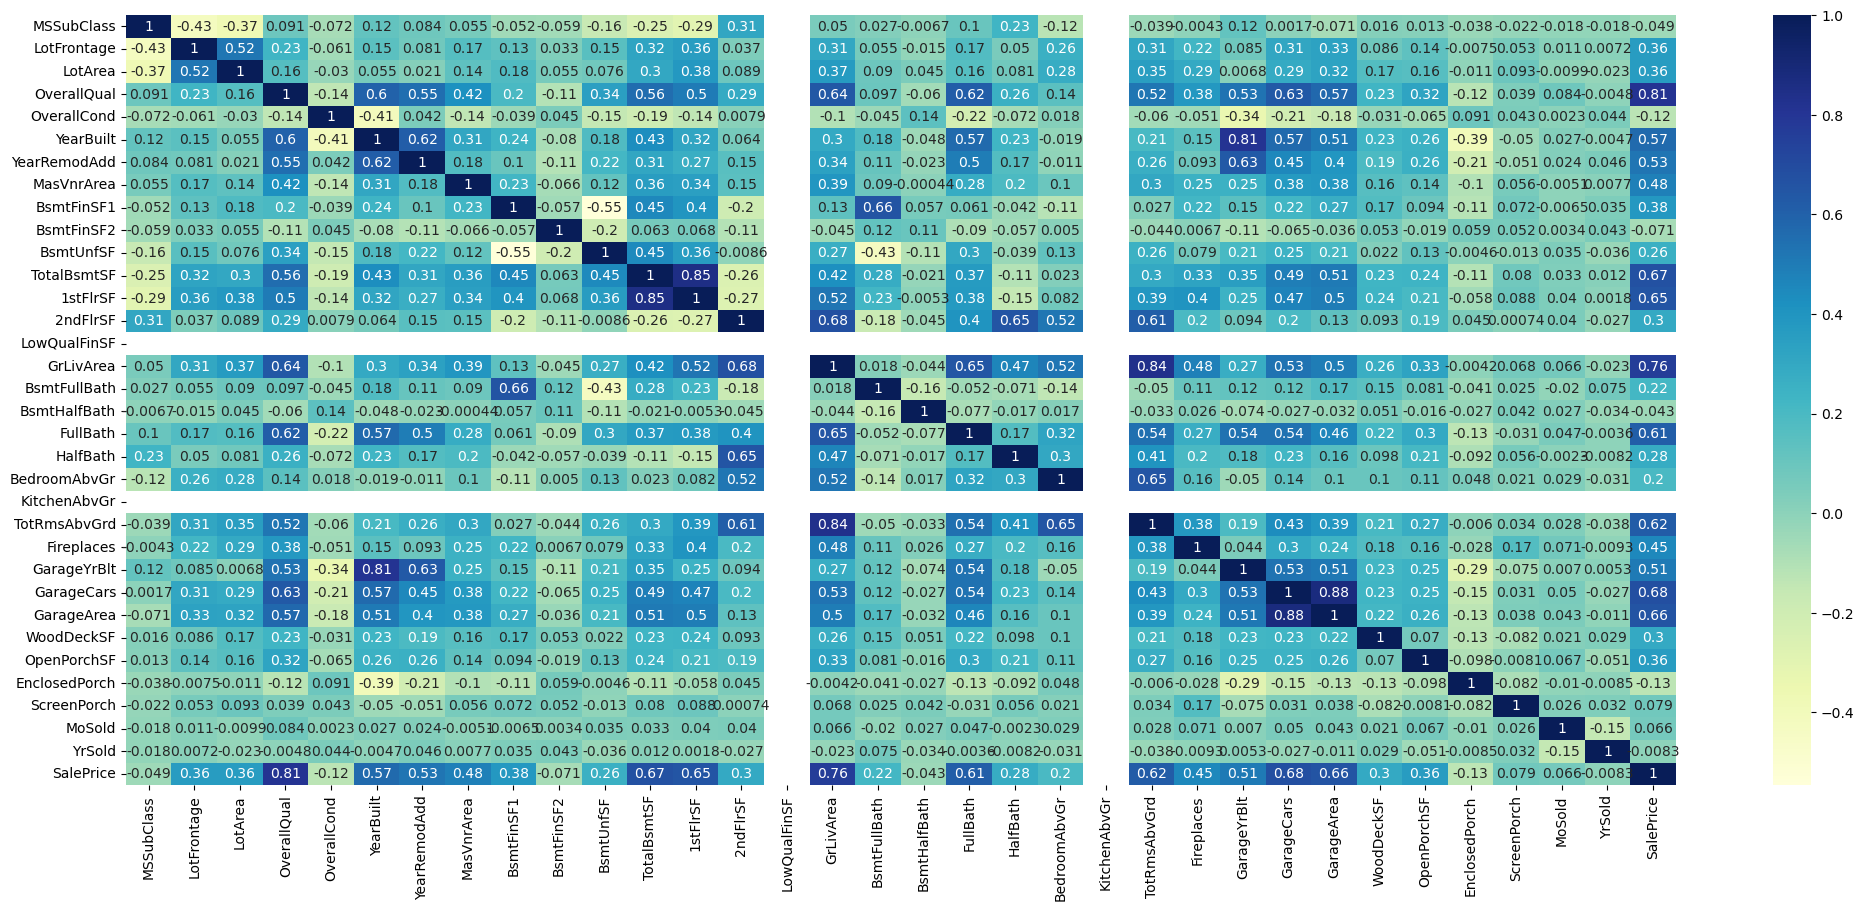

In [29]:
#Drawing heatmap to find correlation between variables
plt.figure(figsize=(25,10))
sns.heatmap(df[continous_col].corr(),annot=True,cmap='YlGnBu')
plt.show()

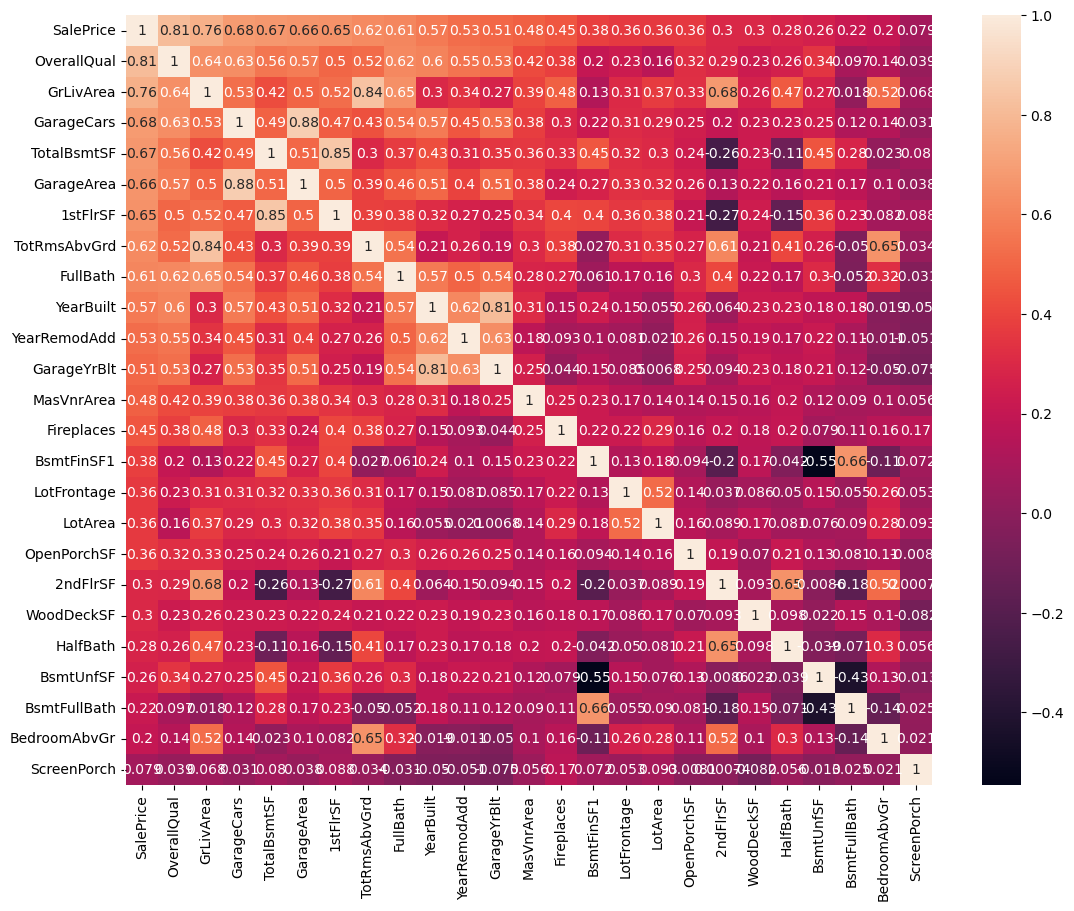

In [30]:
#Finding Sales price correlation matrix
plt.figure(figsize = (13,10))
#considering top 25 variables having hihest correlation
n= 25 
corrSalesMatrix = df[continous_col].corr()
cols = corrSalesMatrix.nlargest(n,'SalePrice')['SalePrice'].index
sns.heatmap(df[cols].corr(),annot=True)
plt.show()

conclusion - 'OverallQual',  'GrLivArea','GarageCars',TotalBsmtSF, 'GarageArea','1stFlrSF' are highly correlated to SalespriceSold',

## Step 4: Data Preparation

### Dummy Variable

In [31]:
categorical_col = df.select_dtypes(include = 'object').columns

In [32]:
#Dropping first column as n-1 explains n categories
df = pd.get_dummies(data=df,columns=categorical_col,drop_first=True)

In [33]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,SalePrice,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,...,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,2,2008,208500,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False,True,False,F

## Step 5: Model Building

### Splitting the data into train and test sets

In [34]:
y = df.pop('SalePrice')


In [35]:
y.head()

0    208500
1    181500
2    223500
3    140000
4    250000
Name: SalePrice, dtype: int64

In [36]:
X= df
X.shape

(1333, 218)

In [37]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.3,random_state=42)

In [38]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,...,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
366,20,69.0,9500,6,5,1963,1963,247.0,609,0,785,1394,1394,0,0,1394,1,0,1,1,3,1,6,2,1963.0,2,514,0,76,0,185,7,2009,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,True,True,False,False,False,False,False,False,False,False,True,True,False,False,False,False,False,True,False,False,True,False,False,False,True,False,False

In [39]:
## Rescaling variables
updatedContinousVariable = X_train.select_dtypes(include=['int64','int32','float64','float32']).columns
updatedContinousVariable

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [40]:
scaler = MinMaxScaler()
X_train[updatedContinousVariable] =scaler.fit_transform(X_train[updatedContinousVariable])
X_test[updatedContinousVariable] = scaler.transform(X_test[updatedContinousVariable])

In [41]:
X_train.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,...,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
366,0.000000,0.298137,0.228770,0.555556,0.500,0.656716,0.216667,0.218778,0.278336,0.000000,0.336045,0.434810,0.332606,0.000000,0.0,0.308055,0.5,0.0,0.333333,0.5,0.500000,0.0,0.333333,0.666667,0.53,0.50,0.369784,0.000000,0.208791,0.000000,0.467172,0.545455,0.75,False,False,True,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,True,True,False,False,False,False,False,True,False,False,False,True,False,False,True,T

In [42]:
X_train.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
count,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.0,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.0,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000,933.000000
mean,0.200082,0.299082,0.236102,0.567107,0.573687,0.732079,0.593569,0.091554,0.203160,0.046448,0.243272,0.329033,0.244017,0.205855,0.0,0.337780,0.213290,0.028403,0.512326,0.195606,0.469096,0.0,0.378707,0.206860,0.691340,0.447213,0.344476,0.126928,0.124701,0.058505,0.033654,0.475397,0.454448
std,0.243970,0.125190,0.122682,0.147522,0.136892,0.216949,0.342201,0.153874,0.196490,0.154329,0.185847,0.126000,0.133727,0.261171,0.0,0.161016,0.250654,0.118092,0.178738,0.248498,0.122674,0.0,0.165887,0.210503,0.236896,0.177043,0.148137,0.166580,0.164499,0.158879,0.124659,0.246907,0.335353
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.242236,0.174212,0.444444,0.500000,0.604478,0.300000,0.000000,0.000000,0.000000,0.102740,0.248284,0.141557,0.000000,0.0,0.213347,0.000000,0.000000,0.333333,0.000000,0.333333,0.0,0.222222,0.000000,0.520000,0.250000,0.241727,0.000000,0.000000,0.000000,0.000000,0.363636,0.250000
50%,0.176471,0.298137,0.227741,0.555556,0.500000,0.738806,0.733333,0.000000,0.178245,0.000000,0.207192,0.310044,0.219068,0.000000,0.0,0.322548,0.000000,0.000000,0.666667,0.000000,0.500000,0.0,0.333333,0.333333,0.700000,0.500000,0.345324,0.000000,0.074176,0.000000,0.000000,0.454545,0.500000
75%,0.235294,0.354037,0.285898,0.666667,0.625000,0.940299,0.900000,0.141718,0.329068,0.000000,0.340753,0.398004,0.323872,0.441962,0.0,0.422649,0.500000,0.000000,0.666667,0.500000,0.500000,0.0,0.444444,0.333333,0.920000,0.500000,0.414388,0.228261,0.186813,0.000000,0.000000,0.636364,0.750000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [43]:
X_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Norm,Condition2_PosN,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,...,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_TA,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
990,0.235294,0.378882,0.227399,0.777778,0.50,0.910448,0.800000,0.374668,0.490859,0.000000,0.137842,0.435434,0.337336,0.611421,0.0,0.644422,0.5,0.0,0.666667,0.5,0.5,0.0,0.444444,0.333333,0.87,0.75,0.625899,0.000000,0.192308,0.000000,0.0,0.454545,0.00,False,False,True,False,True,False,False,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False,True,False,False,False,True,False,False,True,False,True,Fa

### Model buidling using RFE

In [44]:
lm = LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,n_features_to_select=25)
#rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=25)

In [45]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 34),
 ('LotFrontage', False, 52),
 ('LotArea', True, 1),
 ('OverallQual', True, 1),
 ('OverallCond', False, 12),
 ('YearBuilt', True, 1),
 ('YearRemodAdd', False, 120),
 ('MasVnrArea', False, 37),
 ('BsmtFinSF1', True, 1),
 ('BsmtFinSF2', True, 1),
 ('BsmtUnfSF', True, 1),
 ('TotalBsmtSF', True, 1),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', False, 15),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 177),
 ('BsmtHalfBath', False, 123),
 ('FullBath', False, 141),
 ('HalfBath', False, 192),
 ('BedroomAbvGr', True, 1),
 ('KitchenAbvGr', False, 13),
 ('TotRmsAbvGrd', True, 1),
 ('Fireplaces', False, 162),
 ('GarageYrBlt', False, 136),
 ('GarageCars', False, 29),
 ('GarageArea', False, 183),
 ('WoodDeckSF', False, 79),
 ('OpenPorchSF', False, 78),
 ('EnclosedPorch', False, 101),
 ('ScreenPorch', False, 41),
 ('MoSold', False, 188),
 ('YrSold', False, 159),
 ('MSZoning_FV', False, 43),
 ('MSZoning_RH', False, 48),
 ('MSZoning_RL', False, 49),


In [46]:
#Extracting the top features from RFE
col = X_train.columns[rfe.support_]
col

Index(['LotArea', 'OverallQual', 'YearBuilt', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Street_Pave', 'LandSlope_Sev',
       'RoofStyle_Shed', 'RoofMatl_Metal', 'Exterior1st_CBlock',
       'Exterior1st_Stone', 'Exterior2nd_CBlock', 'ExterQual_Gd',
       'ExterQual_TA', 'Heating_OthW', 'GarageCond_Fa', 'GarageCond_Po',
       'GarageCond_TA'],
      dtype='object')

In [47]:
X_train_rfe = X_train[col]
X_test_rfe = X_test[col]

In [48]:
#Building Model with rfe selected features
lm1 = lm.fit(X_train_rfe,y_train)

In [49]:
print(lm1.intercept_)
print(lm1.coef_)

-18978.320638098434
[ 61363.94819085 127143.81314096  44633.4296298   64937.25239204
   7806.31572564  12207.23928893  55418.38467253  76763.35818009
  38284.07392505  91884.51343854 -66296.77517042  54026.5911841
  72187.8965801  -45221.54147912  36057.74004785  45229.93914149
 -36907.54170589 -81078.74881506 -36907.54170589 -57710.48120427
 -67154.82506983 -55738.42739123  -9963.67169902  -5472.52863637
 -11927.21659671]


In [50]:
y_pred_train = lm1.predict(X_train_rfe)
y_pred_test = lm1.predict(X_test_rfe)

### Model Evaluation

In [51]:
#Caluculation R2,MSE,RMSE
metric = []
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

rss_train = np.sum(np.square(y_train-y_pred_train))
rss_test = np.sum(np.square(y_test-y_pred_test))

mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)

rmse_train = np.sqrt(mse_train) 
rmse_test = np.sqrt(mse_test)

metric.extend((r2_train,r2_test,rss_train,rss_test,mse_train,mse_test,rmse_train,rmse_test))
print("r2_train:" ,r2_train,"r2_test:", r2_test,"rss_train:" ,rss_train,"rss_test:" , rss_test,"mse_train:",mse_train,"mse_test:",mse_test,
      "rmse_train:",rmse_train,"rmse_test:", rmse_test)



r2_train: 0.8797871825347676 r2_test: 0.8586516982976304 rss_train: 633037797859.5337 rss_test: 321893729136.32043 mse_train: 678497103.8151486 mse_test: 804734322.8408011 rmse_train: 26047.976962043493 rmse_test: 28367.83958712403


### Ridge And Lasso Regresson

#### Ridge

In [54]:
#list of alphas to tune

params={'alpha':[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,20,50,100,500,1000]}
ridge = Ridge()
folds =5

ridge_model_cv = GridSearchCV(estimator = ridge,
                              param_grid=params,
                              scoring='neg_mean_absolute_error',
                              cv=folds,
                              return_train_score=True,
                              verbose=1)

ridge_model_cv.fit(X_train_rfe,y_train)
                              


Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [55]:
print(ridge_model_cv.best_params_)
print(ridge_model_cv.best_score_)

{'alpha': 2.0}
-19143.974500277716


Optimum value of aplha is 2.0


In [57]:
alpha = 2
ridge=Ridge(alpha=alpha)
ridge.fit(X_train_rfe,y_train)
ridge.coef_

array([ 53429.42881898, 116725.80993836,  47027.62073382,  66983.51963019,
         5678.32100764,  15058.22011026,  58290.86149762,  70154.50521424,
        35802.77072545,  84416.19277636, -46557.29042969,  54422.16893589,
        44293.24823133, -22449.96430729,   8304.40852405,  10077.67544755,
       -16969.52176058, -23027.38858501, -16969.52176058, -50303.56792044,
       -62379.39693435, -16814.62051931,  -7697.43194823,   -139.49474236,
        -8348.82999717])

In [59]:
y_pred_train = ridge.predict(X_train_rfe)
y_pred_test = ridge.predict(X_test_rfe)

In [60]:
#Calculating R2,MSE,RMSE for ridge regression
metric1 = []
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

rss_train = np.sum(np.square(y_train-y_pred_train))
rss_test = np.sum(np.square(y_test-y_pred_test))

mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)

rmse_train = np.sqrt(mse_train) 
rmse_test = np.sqrt(mse_test)

metric1.extend((r2_train,r2_test,rss_train,rss_test,mse_train,mse_test,rmse_train,rmse_test))
print("r2_train:" ,r2_train,"r2_test:", r2_test,"rss_train:" ,rss_train,"rss_test:" , rss_test,"mse_train:",mse_train,"mse_test:",mse_test,
      "rmse_train:",rmse_train,"rmse_test:", rmse_test)

r2_train: 0.8763726463385658 r2_test: 0.8642383653545764 rss_train: 651018663127.7515 rss_test: 309171163171.6443 mse_train: 697769199.4938387 mse_test: 772927907.9291108 rmse_train: 26415.321302112505 rmse_test: 27801.5810329037


#### Lasso  Regression

In [61]:
lasso = Lasso()

In [62]:
lasso_model_cv = GridSearchCV(estimator = lasso,
                              param_grid=params,
                              scoring='neg_mean_absolute_error',
                              cv=folds,
                              return_train_score=True,
                              verbose=1)
lasso_model_cv.fit(X_train_rfe,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [63]:
print(lasso_model_cv.best_params_)
print(lasso_model_cv.best_score_)

{'alpha': 50}
-19215.069791871945


The optimum value of aplha is 50

In [65]:
alpha = 50 
lasso =Lasso(alpha=alpha)
lasso.fit(X_train_rfe,y_train)
lasso.coef_

array([ 58545.63136314, 133814.00836453,  44707.3178115 ,  53503.57184201,
            0.        ,      0.        ,  73282.33238567,  10740.63906508,
            0.        , 156045.7857071 , -54844.03458121,  50009.63586015,
        54717.39731219, -20459.06974865,      0.        ,      0.        ,
       -19361.52881473, -27643.42788904,     -0.        , -52541.49501752,
       -61920.31331474,  -7599.23061289,     -0.        ,      0.        ,
        -2105.29470898])

In [66]:
y_pred_train = lasso.predict(X_train_rfe)
y_pred_test = lasso.predict(X_test_rfe)

In [67]:
#Calculating R2,MSE,RMSE for lasso regression
metric2 = []
r2_train = r2_score(y_train,y_pred_train)
r2_test = r2_score(y_test,y_pred_test)

rss_train = np.sum(np.square(y_train-y_pred_train))
rss_test = np.sum(np.square(y_test-y_pred_test))

mse_train = mean_squared_error(y_train,y_pred_train)
mse_test = mean_squared_error(y_test,y_pred_test)

rmse_train = np.sqrt(mse_train) 
rmse_test = np.sqrt(mse_test)

metric2.extend((r2_train,r2_test,rss_train,rss_test,mse_train,mse_test,rmse_train,rmse_test))
print("r2_train:" ,r2_train,"r2_test:", r2_test,"rss_train:" ,rss_train,"rss_test:" , rss_test,"mse_train:",mse_train,"mse_test:",mse_test,
      "rmse_train:",rmse_train,"rmse_test:", rmse_test)

r2_train: 0.8772967512726669 r2_test: 0.8652796218220864 rss_train: 646152348829.4143 rss_test: 306799900671.30035 mse_train: 692553428.5417088 mse_test: 766999751.6782509 rmse_train: 26316.40987182159 rmse_test: 27694.760365062753


In [69]:
metric

[0.8797871825347676,
 0.8586516982976304,
 633037797859.5337,
 321893729136.32043,
 678497103.8151486,
 804734322.8408011,
 26047.976962043493,
 28367.83958712403]

In [70]:
#Creating a table which contains all metrics
lr_table ={'Metric':['R2 score(Train)','R2 score(Test)','RSS (Train)','RSS (Test)','MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (test)'],
           'Linear Regression':metric}
lr_metric = pd.DataFrame(lr_table,columns=['Metric','Linear Regression'])
rg_metric = pd.Series(metric1,name = 'Ridge Regression')
ls_metric = pd.Series(metric2,name = 'Lasso Regression')

final_metric = pd.concat([lr_metric,rg_metric,ls_metric],axis =1)
final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 score(Train),8.797872e-01,8.763726e-01,8.772968e-01
1,R2 score(Test),8.586517e-01,8.642384e-01,8.652796e-01
2,RSS (Train),6.330378e+11,6.510187e+11,6.461523e+11
3,RSS (Test),3.218937e+11,3.091712e+11,3.067999e+11
4,MSE (Train),6.784971e+08,6.977692e+08,6.925534e+08
5,MSE (Test),8.047343e+08,7.729279e+08,7.669998e+08
6,RMSE (Train),2.604798e+04,2.641532e+04,2.631641e+04
7,RMSE (test),2.836784e+04,2.780158e+04,2.769476e+04


## Model Evaluation

R2_score of lasso regression is slightly better than ridge for test and training dataset, Also RMSE is slightly less for lasso than ridge 

##### Ridge regression

In [73]:
ridge_pred = ridge.predict(X_test_rfe)

Text(0, 0.5, 'ridge_pred')

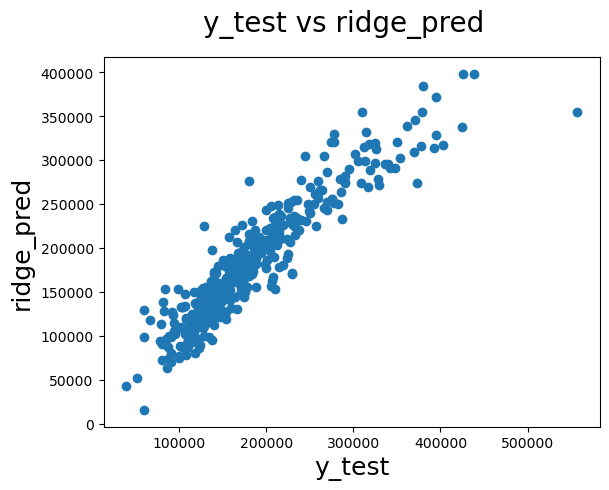

In [74]:
#Plotting y_test vs y_pred for ridge regression
fig = plt.figure()
plt.scatter(y_test,ridge_pred)
fig.suptitle('y_test vs ridge_pred',fontsize=20)
plt.xlabel('y_test',fontsize=18)
plt.ylabel('ridge_pred',fontsize=18)

We observe variance of residuals is constant

Text(0.5, 0, 'Residuals')

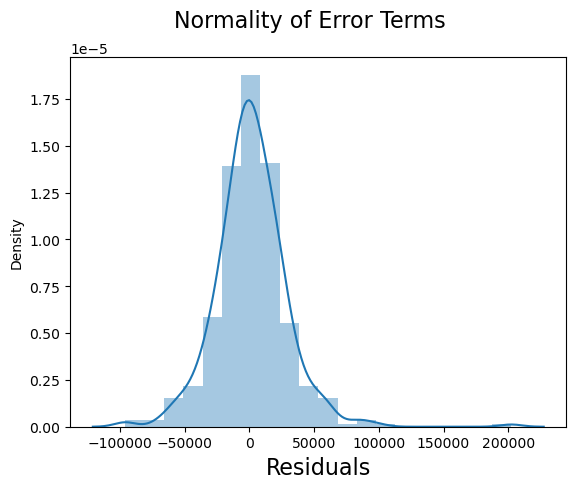

In [77]:
#Error Distribution
fig = plt.figure()
sns.distplot((y_test - ridge_pred), bins = 20)
fig.suptitle('Normality of Error Terms', fontsize = 16)                  # Plot heading 
plt.xlabel('Residuals', fontsize = 16)  


Errors are normally distributed with mean 0.

##### Lasso Regression

In [76]:
lasso_pred = lasso.predict(X_test_rfe)

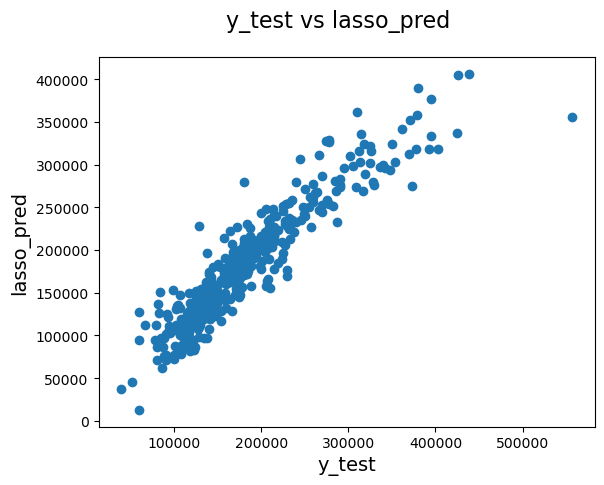

In [82]:
#Plotting y_test vs y_pred for lassoF regression
fig= plt.figure()
plt.scatter(y_test,lasso_pred)
fig.suptitle('y_test vs lasso_pred',fontsize=16)
plt.xlabel('y_test',fontsize=14)
plt.ylabel('lasso_pred',fontsize=14)
plt.show()

We observe variance of residuals is constant

Text(0.5, 0, 'Residuals')

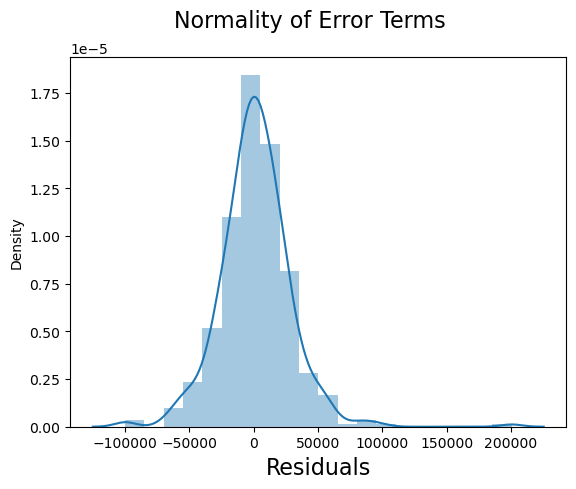

In [83]:
#Error Distribution
fig = plt.figure()
sns.distplot((y_test - lasso_pred), bins = 20)
fig.suptitle('Normality of Error Terms', fontsize = 16)                  # Plot heading 
plt.xlabel('Residuals', fontsize = 16)  


In [85]:
# lets observe the changes in coefficients after regularization
betas = pd.DataFrame(index = X_train_rfe.columns)

In [86]:
betas.rows = X_train_rfe.columns

In [88]:
betas['Linear Regression'] = lm1.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
betas.sort_values(by = 'Lasso',ascending=False)

,Linear Regression,Ridge,Lasso
GrLivArea,91884.513439,84416.192776,156045.785707
OverallQual,127143.813141,116725.809938,133814.008365
TotalBsmtSF,55418.384673,58290.861498,73282.332386
LotArea,61363.948191,53429.428819,58545.631363
Street_Pave,72187.896580,44293.248231,54717.397312
BsmtFinSF1,64937.252392,66983.519630,53503.571842
TotRmsAbvGrd,54026.591184,54422.168936,50009.635860
YearBuilt,44633.429630,47027.620734,44707.317811
1stFlrSF,76763.358180,70154.505214,10740.639065
BsmtUnfSF,12207.239289,15058.220110,0.000000


###  Inferances from the model

#### Variables significant in predicting the price of a house are
    1. GrLivArea
    2. OverallQual
    3. TotalBsmtSF
    4. LotArea
    5. Street_Pave
    6. TotRmsAbvGrd
    7. YearBuilt
    8. YearBuilt

#### These Varibles define the Sales Price by below beta values from ridge and lasso regression where R2 score (Test) for Lasso is 0.865 and ridge is 0.864

In [91]:
betas.sort_values(by = 'Lasso',ascending=False).head(9)

,Linear Regression,Ridge,Lasso
GrLivArea,91884.513439,84416.192776,156045.785707
OverallQual,127143.813141,116725.809938,133814.008365
TotalBsmtSF,55418.384673,58290.861498,73282.332386
LotArea,61363.948191,53429.428819,58545.631363
Street_Pave,72187.896580,44293.248231,54717.397312
BsmtFinSF1,64937.252392,66983.519630,53503.571842
TotRmsAbvGrd,54026.591184,54422.168936,50009.635860
YearBuilt,44633.429630,47027.620734,44707.317811
1stFlrSF,76763.358180,70154.505214,10740.639065
